In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Projects\Airlines_Fare_Predictor\Airlines_Cleaned_File.csv')
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2,1,5955


In [3]:
df.shape

(300153, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int64 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 22.9+ MB


Data is fully pre-processed so I perform next step which is 'feature encoding'.

# Outlier Detection

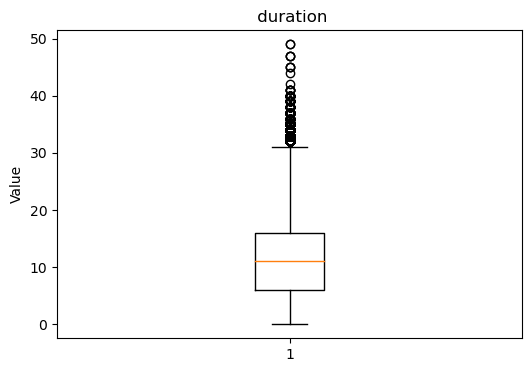

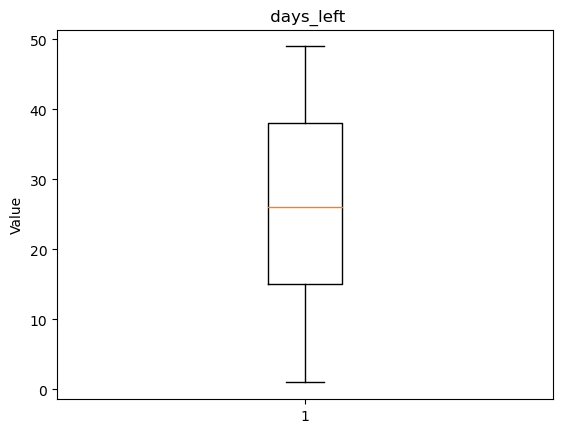

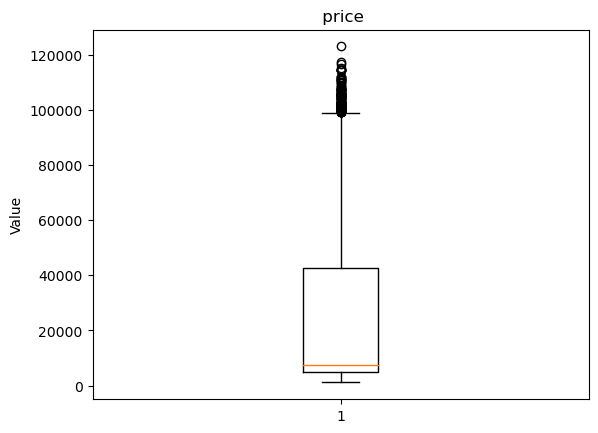

In [5]:
plt.figure(figsize=(6,4))

for column in df.select_dtypes(include='number'):
    plt.boxplot(df[column])
    plt.title(f' {column}')
    plt.ylabel('Value')
    plt.show()

Duration and Price columns have Outliers. Price is the target variable so, we can not treat outliers of price.

In [6]:
df['duration'].unique()

array([ 2, 12, 16, 11, 14, 15,  3,  5,  8,  6, 18, 23, 24,  4, 19, 22, 26,
       17, 20, 21,  7, 10, 28,  9, 13, 29, 27, 30, 25, 31, 33, 36, 35, 34,
       39,  1, 37, 40, 32, 41, 38,  0, 47, 42, 49, 45, 44], dtype=int64)

Duration column have outliers statistically but logically these are not outliers so, I do not drop them.

# Feature Encoding

In [7]:
#checking unique values of all columns
for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: airline
Unique Values:
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

Column: source_city
Unique Values:
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Column: departure_time
Unique Values:
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

Column: stops
Unique Values:
['zero' 'one' 'two_or_more']

Column: arrival_time
Unique Values:
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

Column: destination_city
Unique Values:
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Column: class
Unique Values:
['Economy' 'Business']

Column: duration
Unique Values:
[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]

Column: days_left
Unique Values:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

Column: 

All the categorical variables are nomial. So, One Hot Encoding is the right option.

In [8]:
#using get_dummies method

d1 = pd.get_dummies(df['airline'], drop_first = True,prefix='airline')

d2 = pd.get_dummies(df['source_city'], drop_first = True,prefix='source_city')

d3 = pd.get_dummies(df["departure_time"], drop_first=True,prefix='departure_time')

d4 = pd.get_dummies(df["stops"],drop_first=True,prefix='stops')

d5 = pd.get_dummies(df["arrival_time"],drop_first=True,prefix='arrival_time')

d6 = pd.get_dummies(df["destination_city"],drop_first=True,prefix='destination_city')

d7 = pd.get_dummies(df["class"],drop_first=True,prefix='class')

In [9]:
df = pd.concat([df,d1,d2,d3,d4,d5,d6,d7],axis=1)

In [10]:
df = df.drop(columns=['airline','source_city','departure_time','stops','arrival_time','destination_city','class'])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,2,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [11]:
df.columns.tolist()

['duration',
 'days_left',
 'price',
 'airline_Air_India',
 'airline_GO_FIRST',
 'airline_Indigo',
 'airline_SpiceJet',
 'airline_Vistara',
 'source_city_Chennai',
 'source_city_Delhi',
 'source_city_Hyderabad',
 'source_city_Kolkata',
 'source_city_Mumbai',
 'departure_time_Early_Morning',
 'departure_time_Evening',
 'departure_time_Late_Night',
 'departure_time_Morning',
 'departure_time_Night',
 'stops_two_or_more',
 'stops_zero',
 'arrival_time_Early_Morning',
 'arrival_time_Evening',
 'arrival_time_Late_Night',
 'arrival_time_Morning',
 'arrival_time_Night',
 'destination_city_Chennai',
 'destination_city_Delhi',
 'destination_city_Hyderabad',
 'destination_city_Kolkata',
 'destination_city_Mumbai',
 'class_Economy']

In [12]:
#make a copy of encoded data
encoded_df = df.copy()

# Checking Distribution and Skewness of Data

In [13]:
#checking data types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   duration                      300153 non-null  int64
 1   days_left                     300153 non-null  int64
 2   price                         300153 non-null  int64
 3   airline_Air_India             300153 non-null  uint8
 4   airline_GO_FIRST              300153 non-null  uint8
 5   airline_Indigo                300153 non-null  uint8
 6   airline_SpiceJet              300153 non-null  uint8
 7   airline_Vistara               300153 non-null  uint8
 8   source_city_Chennai           300153 non-null  uint8
 9   source_city_Delhi             300153 non-null  uint8
 10  source_city_Hyderabad         300153 non-null  uint8
 11  source_city_Kolkata           300153 non-null  uint8
 12  source_city_Mumbai            300153 non-null  uint8
 13  departure_time

Only 2 Variables needs to check distribution: 'duration', 'days_left'

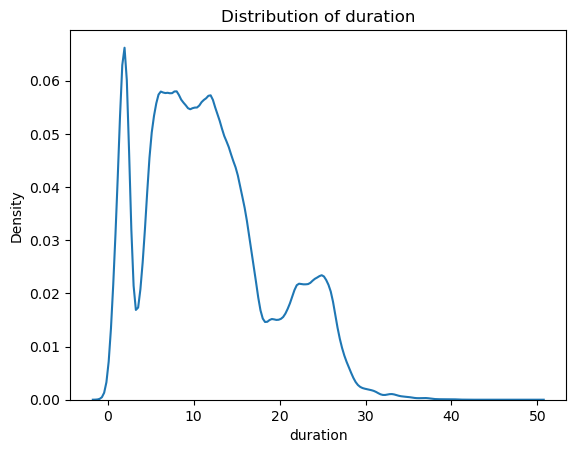

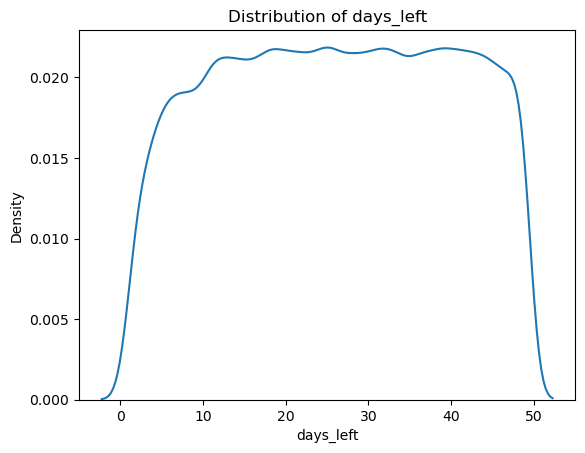

In [14]:
columns = ['duration', 'days_left']

for column in columns:
    sns.kdeplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

In [15]:
df['days_left'].skew()

-0.03546434955066582

In [16]:
df['duration'].skew()

0.6013368207014413

'days_left' is not skewed and 'duration' is moderate skewed. Therefore, transformation is not needed.

# Feature Scaling

In [17]:
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,2,1,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,2,1,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,2,1,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,2,1,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [18]:
print(df['duration'].unique())

[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]


In [19]:
print(df['duration'].unique())

[ 2 12 16 11 14 15  3  5  8  6 18 23 24  4 19 22 26 17 20 21  7 10 28  9
 13 29 27 30 25 31 33 36 35 34 39  1 37 40 32 41 38  0 47 42 49 45 44]


Only 2 variables needs scaling: 'duration', 'duration'. I decide to apply min_max scaler because data has a bounded range.

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [21]:
columns_to_scale = ['duration', 'days_left']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0.040816,0.0,5953,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0.040816,0.0,5953,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1
2,0.040816,0.0,5956,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1
3,0.040816,0.0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1
4,0.040816,0.0,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [22]:
len(df.columns)

31

# Diving data into train and test set

In [23]:
x = df.drop("price",axis=1)
y = df['price']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape, X_test.shape

((210107, 30), (90046, 30))

In [26]:
y_train.shape, y_test.shape

((210107,), (90046,))

# Feature Selection using Random Forest Feature Importance Method



In [27]:
from sklearn.ensemble import RandomForestRegressor  

random_forest = RandomForestRegressor(n_jobs=-1)  

random_forest.fit(X_train, y_train)

importances = random_forest.feature_importances_

feature_importance_rankings = dict(zip(X_train.columns, importances))

sorted_rankings = sorted(feature_importance_rankings.items(), key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(sorted_rankings, 1):
    print(f"{i}. {feature}: {importance}")

1. class_Economy: 0.8819154840035603
2. duration: 0.05183605087619832
3. days_left: 0.020872773577502293
4. airline_Air_India: 0.005194335638327616
5. airline_Vistara: 0.0051461793907349816
6. source_city_Delhi: 0.003852111768548779
7. destination_city_Delhi: 0.0037230035481984015
8. source_city_Mumbai: 0.002499402884746617
9. destination_city_Mumbai: 0.002419100179077109
10. source_city_Kolkata: 0.0020700083897992553
11. destination_city_Hyderabad: 0.002054791166210078
12. arrival_time_Evening: 0.0019260630661942842
13. destination_city_Kolkata: 0.0018901291757795404
14. stops_two_or_more: 0.001723113130643537
15. source_city_Hyderabad: 0.001649887173980844
16. arrival_time_Night: 0.0015008408685962097
17. departure_time_Morning: 0.001487458354104108
18. departure_time_Evening: 0.0013490705743308391
19. destination_city_Chennai: 0.0013362310233462048
20. source_city_Chennai: 0.0013355649459157518
21. departure_time_Early_Morning: 0.0010128769772839363
22. departure_time_Night: 0.00089

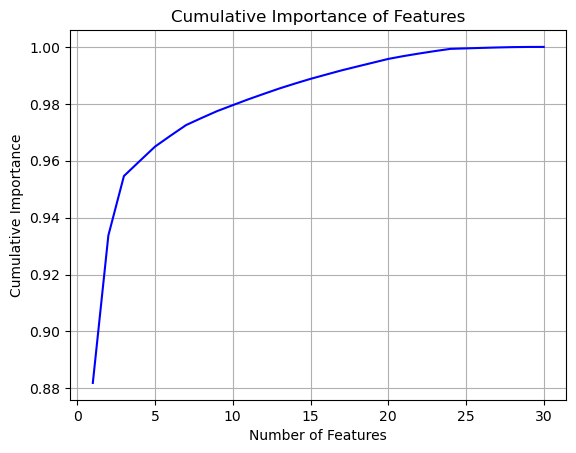

In [28]:
sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

Top 25 features are important for model building

In [29]:
# Get the feature importances
feature_importances = random_forest.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

# Select the top 25 features
top_features = importance_df.head(25)['Feature'].tolist()

# Update X_train and X_test to include only the top features
X_train = X_train[top_features]
X_test = X_test[top_features]

In [30]:
#checking columns of X_train
X_train.columns.tolist()

['class_Economy',
 'duration',
 'days_left',
 'airline_Air_India',
 'airline_Vistara',
 'source_city_Delhi',
 'destination_city_Delhi',
 'source_city_Mumbai',
 'destination_city_Mumbai',
 'source_city_Kolkata',
 'destination_city_Hyderabad',
 'arrival_time_Evening',
 'destination_city_Kolkata',
 'stops_two_or_more',
 'source_city_Hyderabad',
 'arrival_time_Night',
 'departure_time_Morning',
 'departure_time_Evening',
 'destination_city_Chennai',
 'source_city_Chennai',
 'departure_time_Early_Morning',
 'departure_time_Night',
 'arrival_time_Morning',
 'arrival_time_Early_Morning',
 'arrival_time_Late_Night']

### Note:- It is important to check and drop highly correlated variables after feature selection to avoid from multi-colinnearity and overfitting.

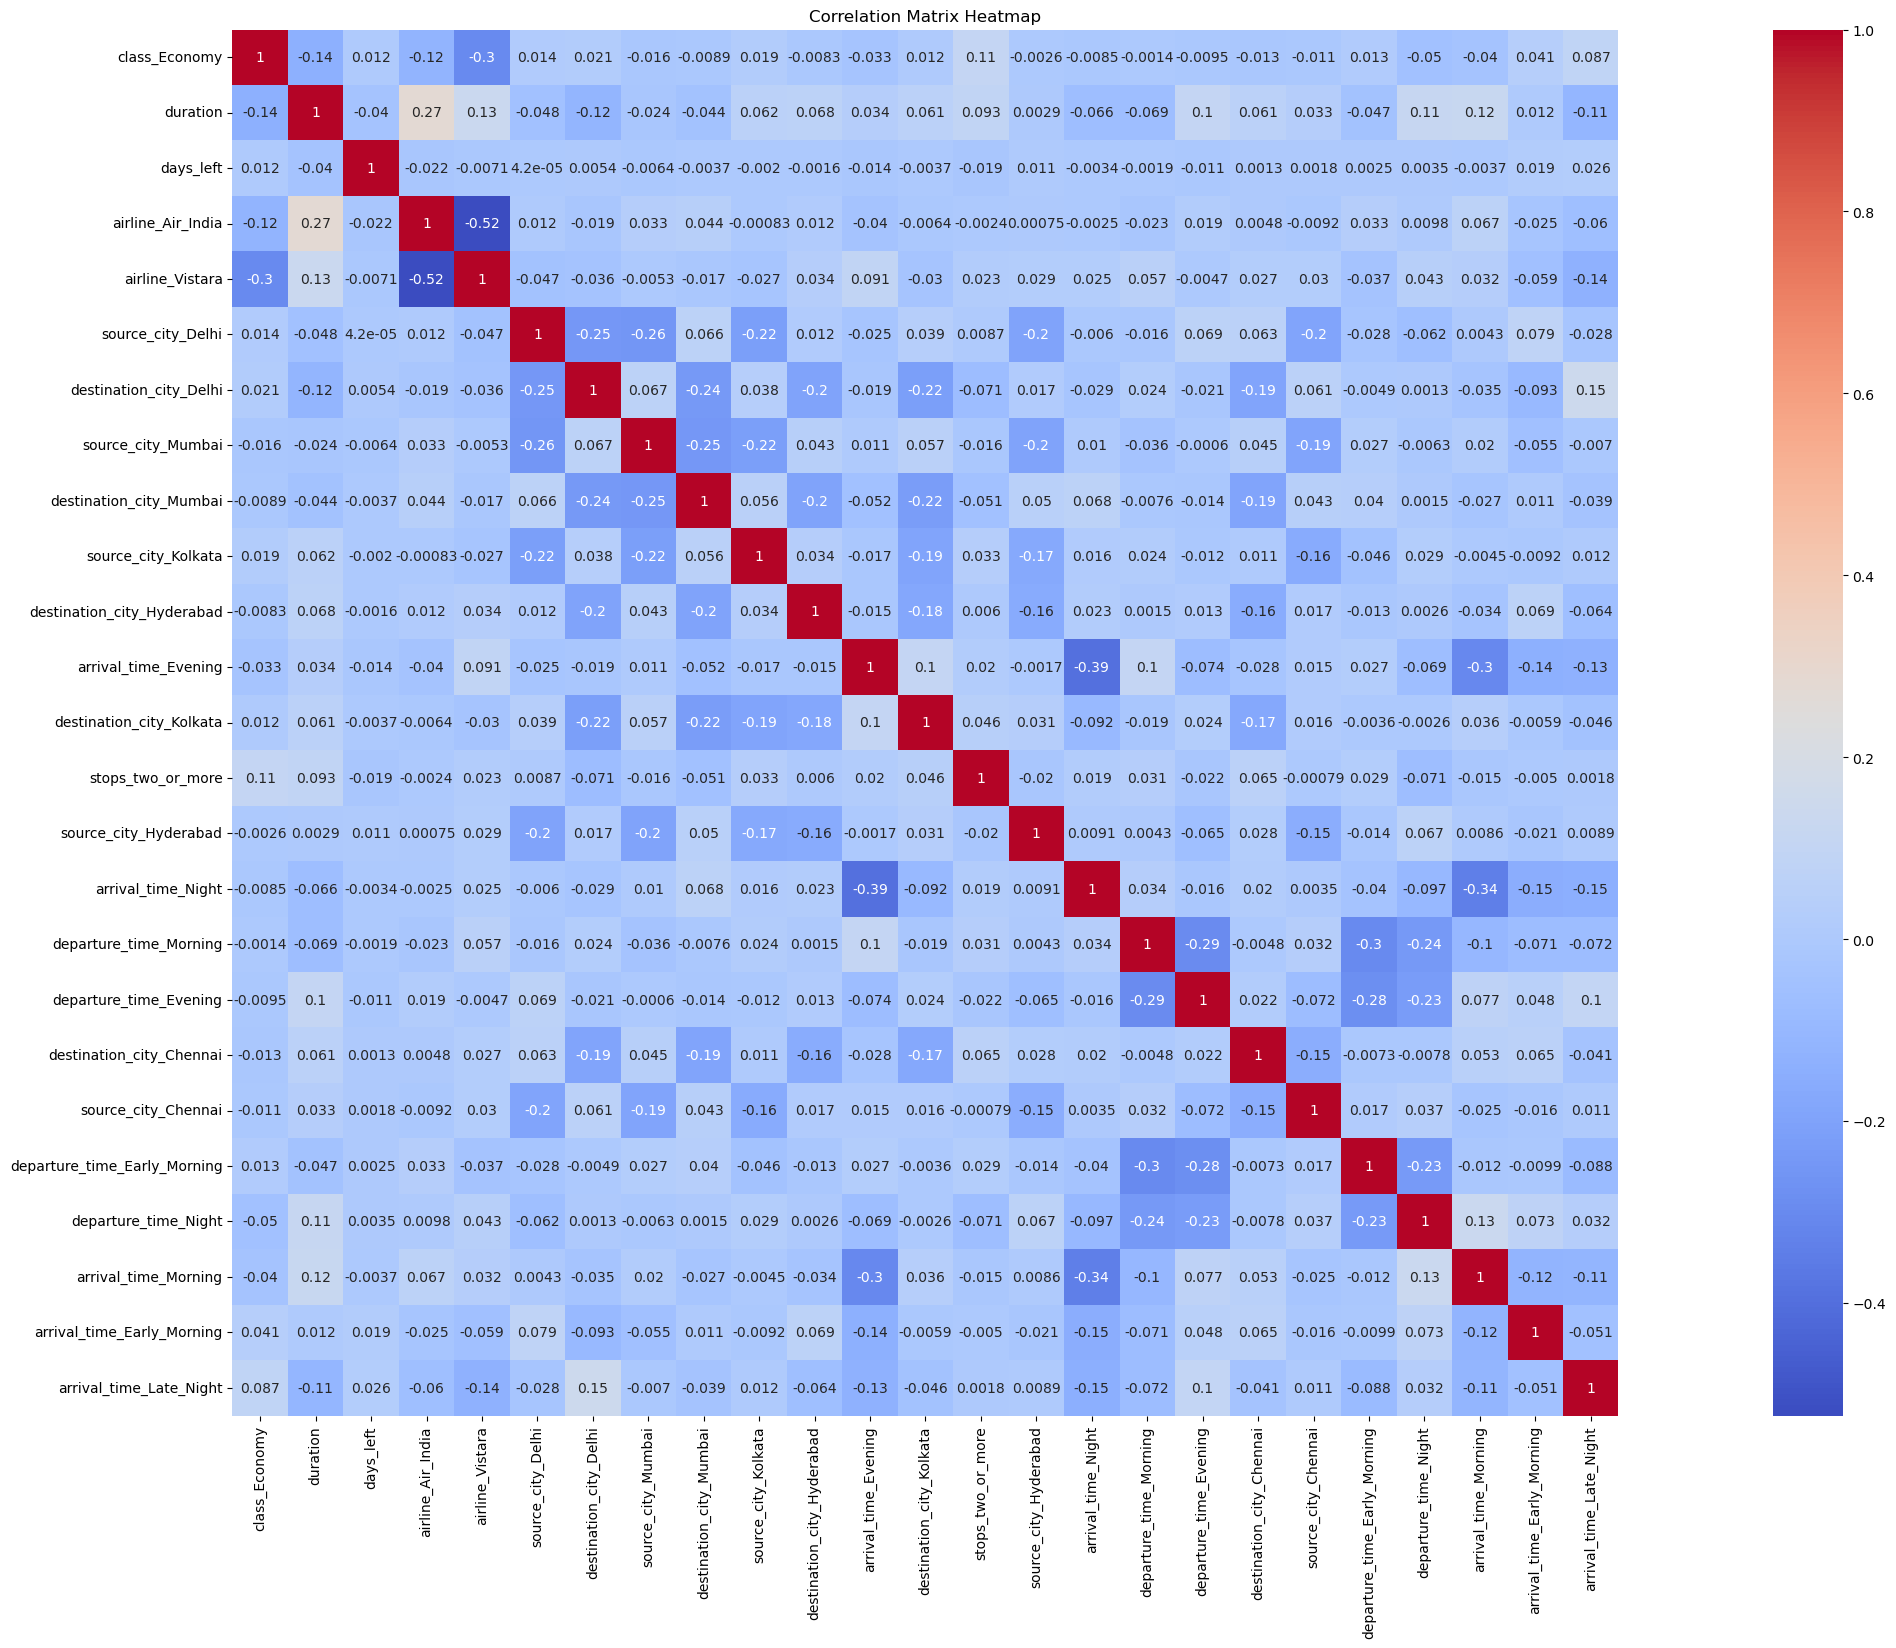

In [31]:
#checking correlation between variables

corr_matrix = X_train.corr()

plt.figure(figsize=(40,18)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

No variable is highly correlated

# Model Building

In [32]:
# import regression algorithms and metrics
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
# Create a dictionary to store the results
results = {
    'Model': [],
    'MSE (Train)': [], 
    'RMSE (Train)': [],
    'MAE (Train)': [],
    'R-squared (Train)': [],
    'Adjusted R-squared (Train)': [],
    'MSE (Test)': [],
    'RMSE (Test)': [],
    'MAE (Test)': [],
    'R-squared (Test)': [],
    'Adjusted R-squared (Test)': [],
    'Building Time (s)': []
}

models = [
    LinearRegression(n_jobs=-1),
    Ridge(random_state=42),
    Lasso(random_state=42),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(n_jobs=-1, random_state=42),
    AdaBoostRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42),
    XGBRegressor(n_jobs=-1, random_state=42)
]

# Iterate over the models
for model in models:
    start_time = time.time()  # Start timer

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics on the training data
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    n_train = X_train.shape[0]
    p_train = X_train.shape[1]
    adj_r2_train = 1 - ((1 - r2_train) * (n_train - 1) / (n_train - p_train - 1))

    # Calculate evaluation metrics on the test data
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    n_test = X_test.shape[0]
    p_test = X_test.shape[1]
    adj_r2_test = 1 - ((1 - r2_test) * (n_test - 1) / (n_test - p_test - 1))

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    # Store the results in the dictionary
    results['Model'].append(type(model).__name__)
    results['MSE (Train)'].append(mse_train)
    results['RMSE (Train)'].append(rmse_train)
    results['MAE (Train)'].append(mae_train)
    results['R-squared (Train)'].append(r2_train)
    results['Adjusted R-squared (Train)'].append(adj_r2_train)
    results['MSE (Test)'].append(mse_test)
    results['RMSE (Test)'].append(rmse_test)
    results['MAE (Test)'].append(mae_test)
    results['R-squared (Test)'].append(r2_test)
    results['Adjusted R-squared (Test)'].append(adj_r2_test)
    results['Building Time (s)'].append(building_time)

In [34]:
pd.options.display.float_format = '{:.4f}'.format
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='MSE (Test)').reset_index(drop=True)
df_results

,Model,MSE (Train),RMSE (Train),MAE (Train),R-squared (Train),Adjusted R-squared (Train),MSE (Test),RMSE (Test),MAE (Test),R-squared (Test),Adjusted R-squared (Test),Building Time (s)
0,RandomForestRegressor,3444487.8292,1855.9331,757.7928,0.9933,0.9933,12860927.5293,3586.2135,1583.9164,0.9750,0.9750,49.1279
1,XGBRegressor,13342272.9904,3652.7076,2120.1761,0.9741,0.9741,14289585.1435,3780.1568,2170.3794,0.9722,0.9722,6.9671
2,DecisionTreeRegressor,2544253.7920,1595.0717,411.7581,0.9951,0.9951,18928268.7103,4350.6630,1750.9364,0.9632,0.9632,1.4031
3,GradientBoostingRegressor,24888574.3122,4988.8450,3012.2477,0.9517,0.9517,25197205.3872,5019.6818,3007.9341,0.9510,0.9510,23.4457
4,AdaBoostRegressor,37983078.8875,6163.0414,4082.0837,0.9263,0.9263,38754941.0129,6225.3467,4096.2869,0.9247,0.9247,28.6969
5,Lasso,49951578.2393,7067.6430,4487.9971,0.9031,0.9031,49767008.1442,7054.5736,4454.0351,0.9033,0.9033,0.2343
6,Ridge,49951126.0168,7067.6111,4490.7090,0.9031,0.9031,49767511.7340,7054.6093,4456.8275,0.9033,0.9033,0.1250
7,LinearRegression,49951125.5255,7067.6110,4490.7559,0.9031,0.9031,49767576.0095,7054.6138,4456.8777,0.9033,0.9033,0.3562


I Choose Random Forest as Final Model because it has lowest "MSE" and highest "Adjusted R-squared" on test data and it doesn't overfit and underfit.

In [35]:
# Build Random Forest Model

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

# Hyper Parameter Tunning for Model Optimization

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train, y_train)

### This error shows that there is insufficient memory available in RAM and due to lack of computational power hyperparameter tunning fails. So, I decide to perform Cross-Validation instead of hyperparameter tunning.

In [38]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5,scoring='r2')

In [39]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.97554668 0.97616914 0.97545285 0.97551862 0.97571524]
Mean CV score: 0.9756805046535415
Standard deviation of CV scores: 0.00025919587659202584


# Conclusion:-

R-square of cross-validation:- 0.9756

Evaulation of Random Forest Algorithm on Train Data:-
    
1) MSE :- 3444487.8292


2) RMSE:- 1855.9331


3) MAE:-757.7928


4) R-Sqaured :- 0.9933


5) Adjusted R-Sqaured:-0.9933


Evaulation of Random Forest Algorithm on Test Data:-
    
1) MSE :- 12860927.5293


2) RMSE:-3586.2135


3) MAE:-1583.9164


4) R-Sqaured :- 0.9750


5) Adjusted R-Sqaured :- 0.9750	

# Save model to a file

In [40]:
import joblib


model = rf

# Save the model to a file
joblib.dump(model, 'Airlines_Fare_Predictor.pkl')

['Airlines_Fare_Predictor.pkl']